In [1]:
import pandas as pd
import numpy as np
import klib
#from dataprep.eda import create_report

In [2]:
DATA_PATH = '../data/'

In [3]:
df = pd.read_csv(DATA_PATH+'df_tfs_xa_plus_meteo.csv')

df['H_BOOKINGDATE'] = pd.to_datetime(df['H_BOOKINGDATE'])
df['H_STARTDATE'] = pd.to_datetime(df['H_STARTDATE'])
df['H_ENDDATE'] = pd.to_datetime(df['H_ENDDATE'])
df['I_BOOKINGDATE'] = pd.to_datetime(df['I_BOOKINGDATE'])
df['I_STARTDATE'] = pd.to_datetime(df['I_STARTDATE'])
df['I_ENDDATE'] = pd.to_datetime(df['I_ENDDATE'])
df['fecha'] = pd.to_datetime(df['fecha'])

df.head()

,Unnamed: 0,H_BO_HEADERID,H_BOOKINGDATE,H_STARTDATE,H_ENDDATE,H_DURATION,H_DAYSBEFOREBOOK,I_BO_ITEMID,I_BOOKINGDATE,I_STARTDATE,...,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin,lat,lon
0,0,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811718,2018-10-05,2019-01-14,...,14.8,24.5,99.0,5.0,9.2,9.7,1013.5,1010.3,28.046991,-16.561157
1,1,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811786,2018-10-05,2019-01-22,...,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,28.046991,-16.561157
2,2,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,59637648,2018-10-05,2019-01-22,...,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,28.046991,-16.561157
3,3,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,59244068,2018-10-05,2019-01-16,...,9.4,16.1,11.0,3.9,8.9,5.7,952.5,948.7,28.477497,-16.329445
4,4,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811620,2018-10-05,2019-01-16,...,15.1,22.8,99.0,7.8,12.8,9.8,1014.3,1010.3,28.046991,-16.561157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             25429 non-null  int64         
 1   H_BO_HEADERID          25429 non-null  int64         
 2   H_BOOKINGDATE          25429 non-null  datetime64[ns]
 3   H_STARTDATE            25429 non-null  datetime64[ns]
 4   H_ENDDATE              25429 non-null  datetime64[ns]
 5   H_DURATION             25429 non-null  int64         
 6   H_DAYSBEFOREBOOK       25429 non-null  int64         
 7   I_BO_ITEMID            25429 non-null  int64         
 8   I_BOOKINGDATE          25429 non-null  datetime64[ns]
 9   I_STARTDATE            25429 non-null  datetime64[ns]
 10  I_ENDDATE              25429 non-null  datetime64[ns]
 11  I_DURATION             25429 non-null  int64         
 12  I_DAYSBEFOREBOOK       25429 non-null  int64         
 13  I

In [5]:
rows_to_drop = ['Unnamed: 0'
,'H_BO_HEADERID'
,'H_BOOKINGDATE'
,'H_STARTDATE'
,'H_ENDDATE'
,'H_DURATION'
,'H_DAYSBEFOREBOOK'
,'I_DURATION'
,'I_BO_ITEMID'
,'I_ENDDATE'
,'I_OD_RESORTOFFICEID'
,'I_OD_STOCKID'
,'GD_STOCKTYPEGROUPCODE'
,'SERVICEUNITDESC'
,'SOURCE_MARKET'
,'SOURCE_COUNTRY_NAME'
,'I_LATITUD'
,'I_LONGITUD'
,'TR_NUM_OF_SERVICES'
,'TR_TOTAL_SALES'
,'XA_NUM_OF_SERVICES'
,'XA_TOTAL_SALES'
,'AC_NUM_OF_SERVICES'
,'AC_TOTAL_SALES'
,'AC_AVG_RATING'
,'indicativo'
,'fecha'
,'lat'
,'lon'
]

df.drop(rows_to_drop,axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        25429 non-null  datetime64[ns]
 1   I_STARTDATE          25429 non-null  datetime64[ns]
 2   I_DAYSBEFOREBOOK     25429 non-null  int64         
 3   STOCK_CODE           25429 non-null  object        
 4   STOCK_NAME           25429 non-null  object        
 5   I_TOTAL_SALES_SC     25429 non-null  int64         
 6   SOURCE_COUNTRY_CODE  25428 non-null  object        
 7   ADT                  25429 non-null  int64         
 8   CHD                  25429 non-null  int64         
 9   INF                  25429 non-null  int64         
 10  AVG_ADT_AGE          14415 non-null  float64       
 11  LEAD_PAX_AGE         14517 non-null  float64       
 12  tmed                 25373 non-null  float64       
 13  prec                 25429 non-

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I_DAYSBEFOREBOOK,25429.0,5.865469,22.023339,-1.0,1.0,2.0,4.0,443.0
I_TOTAL_SALES_SC,25429.0,101.101144,71.387998,-183.0,62.0,98.0,128.0,1920.0
ADT,25429.0,2.246883,1.335731,0.0,2.0,2.0,2.0,42.0
CHD,25429.0,0.306422,0.671868,0.0,0.0,0.0,0.0,9.0
INF,25429.0,0.026938,0.183535,0.0,0.0,0.0,0.0,5.0
AVG_ADT_AGE,14415.0,43.482345,16.247405,9.0,30.0,41.0,56.0,99.0
LEAD_PAX_AGE,14517.0,44.878418,16.904185,2.0,30.0,46.0,57.0,99.0
tmed,25373.0,21.576676,2.824651,11.7,19.2,21.8,23.8,30.4
prec,25429.0,0.172677,1.401789,0.0,0.0,0.0,0.0,42.8
tmin,25373.0,17.663351,2.830238,7.4,15.5,17.9,19.9,25.7


In [7]:
df.select_dtypes(include=['datetime64[ns]']).astype('datetime64[ns]').describe(datetime_is_numeric=True).transpose()

,count,mean,min,25%,50%,75%,max
I_BOOKINGDATE,25429,2019-07-08 04:59:47.400212224,2018-01-09,2019-04-15,2019-07-19,2019-09-26,2019-12-31
I_STARTDATE,25429,2019-07-15 19:47:02.494002944,2019-01-01,2019-04-26,2019-07-25,2019-10-07,2019-12-31


In [8]:
df.select_dtypes(include=['object']).astype('object').describe().transpose()

,count,unique,top,freq
STOCK_CODE,25429,155,XESTCIB2T2,3205
STOCK_NAME,25429,154,Siam Park,3219
SOURCE_COUNTRY_CODE,25428,12,GB,17287


# Distribution of the target class
 
**stock_code**: the excursion we want to predict.
 
unique = 164
 
 let's show only the top 50

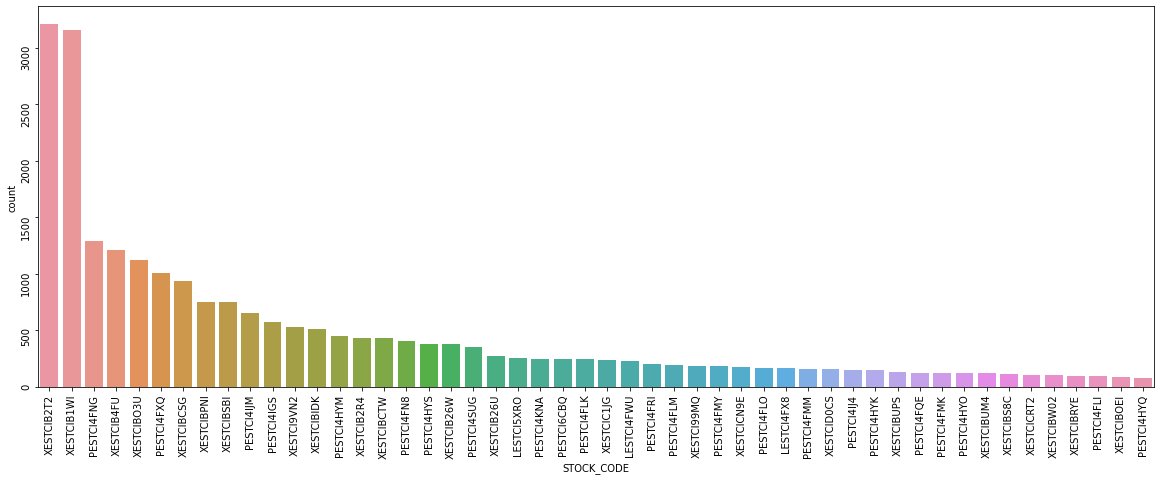

In [9]:
top = 50

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
chart = sns.countplot(x="STOCK_CODE", data=df, order = df['STOCK_CODE'].value_counts()[:top].index)
chart.tick_params(rotation=90)

In [10]:
pd.DataFrame( df.groupby(['STOCK_NAME']).size().sort_values(ascending=False).head(30) )

,0
STOCK_NAME,
Siam Park,3219
Loro Park,3205
Royal Delfin,1286
Teide National Park,1207
Loro Express Exclusive,1119
Mts. Inselrundfahrt - Tour de Ile,1008
Teide Masca (Grand Tour),934
Freebird (3H Vip Exclusive),747
Mts. Teide South,747


In [11]:
#select top 25 excursions and discard the top 2 
top_xa = pd.DataFrame( df.groupby(['STOCK_CODE']).size().sort_values(ascending=False).head(30) )
top_xa = top_xa.iloc[2:(2+25)]
print(top_xa)

               0
STOCK_CODE      
PESTCI4FNG  1286
XESTCIB4FU  1207
XESTCIBO3U  1119
PESTCI4FXQ  1008
XESTCIBCSG   934
XESTCIBPNI   747
XESTCIBSBI   747
PESTCI4IJM   657
PESTCI4IGS   576
XESTCI9VN2   530
XESTCIBIDK   514
PESTCI4HYM   453
XESTCIB2R4   435
XESTCIBCTW   433
PESTCI4FN8   406
PESTCI4HYS   379
XESTCIB26W   376
PESTCI4SUG   352
XESTCIB26U   269
LESTCI5XRO   253
PESTCI4KNA   251
PESTCI6CBQ   245
PESTCI4FLK   243
XESTCIC1JG   240
LESTCI4FWU   231


In [12]:
top_xa.index

Index(['PESTCI4FNG', 'XESTCIB4FU', 'XESTCIBO3U', 'PESTCI4FXQ', 'XESTCIBCSG',
       'XESTCIBPNI', 'XESTCIBSBI', 'PESTCI4IJM', 'PESTCI4IGS', 'XESTCI9VN2',
       'XESTCIBIDK', 'PESTCI4HYM', 'XESTCIB2R4', 'XESTCIBCTW', 'PESTCI4FN8',
       'PESTCI4HYS', 'XESTCIB26W', 'PESTCI4SUG', 'XESTCIB26U', 'LESTCI5XRO',
       'PESTCI4KNA', 'PESTCI6CBQ', 'PESTCI4FLK', 'XESTCIC1JG', 'LESTCI4FWU'],
      dtype='object', name='STOCK_CODE')

In [13]:
df_top = df[df['STOCK_CODE'].isin(top_xa.index)]
df_top

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,...,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
0,2018-10-05,2019-01-14,249,XESTCIBSBI,Mts. Teide South,47,FI,2,0,0,...,19.6,0.0,14.8,24.5,99.0,5.0,9.2,9.7,1013.5,1010.3
1,2018-10-05,2019-01-22,257,PESTCI4KNA,Mts. La Gomera,110,FI,2,0,0,...,18.2,0.0,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3
2,2018-10-05,2019-01-22,257,LESTCI5XRO,Fred Olsen,0,FI,2,0,0,...,18.2,0.0,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3
5,2018-12-30,2019-02-01,3,LESTCI5XRO,Fred Olsen,0,FI,2,2,0,...,17.9,0.0,16.5,19.3,99.0,3.3,10.3,0.0,1013.2,1010.3
6,2018-12-30,2019-02-01,2,PESTCI4KNA,Mts. La Gomera,164,FI,2,2,0,...,17.9,0.0,16.5,19.3,99.0,3.3,10.3,0.0,1013.2,1010.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25418,2019-12-30,2019-12-30,0,PESTCI4FNG,Royal Delfin,165,GB,2,2,0,...,21.5,0.0,15.8,27.2,6.0,5.8,11.7,9.6,1016.0,1012.6
25421,2019-12-30,2019-12-30,0,PESTCI4FNG,Royal Delfin,60,NL,2,1,0,...,21.5,0.0,15.8,27.2,6.0,5.8,11.7,9.6,1016.0,1012.6
25422,2019-12-31,2019-12-31,0,PESTCI4HYS,Gomera Safari Tour,250,GB,2,1,0,...,18.4,0.0,13.6,23.1,99.0,5.0,12.5,9.9,1017.2,1014.7
25423,2019-12-29,2019-12-29,0,XESTCIB4FU,Teide National Park,78,GB,4,0,0,...,20.7,0.0,15.5,25.9,18.0,3.1,5.8,NaN,1009.2,1005.3


In [14]:
cols = df_top.select_dtypes(include=[np.float64]).columns
df_top[cols] = df_top[cols].astype(np.float32)
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13891 entries, 0 to 25424
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        13891 non-null  datetime64[ns]
 1   I_STARTDATE          13891 non-null  datetime64[ns]
 2   I_DAYSBEFOREBOOK     13891 non-null  int64         
 3   STOCK_CODE           13891 non-null  object        
 4   STOCK_NAME           13891 non-null  object        
 5   I_TOTAL_SALES_SC     13891 non-null  int64         
 6   SOURCE_COUNTRY_CODE  13891 non-null  object        
 7   ADT                  13891 non-null  int64         
 8   CHD                  13891 non-null  int64         
 9   INF                  13891 non-null  int64         
 10  AVG_ADT_AGE          8258 non-null   float32       
 11  LEAD_PAX_AGE         8256 non-null   float32       
 12  tmed                 13855 non-null  float32       
 13  prec                 13891 non-

/Users/tomeumir/opt/anaconda3/envs/mbit/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


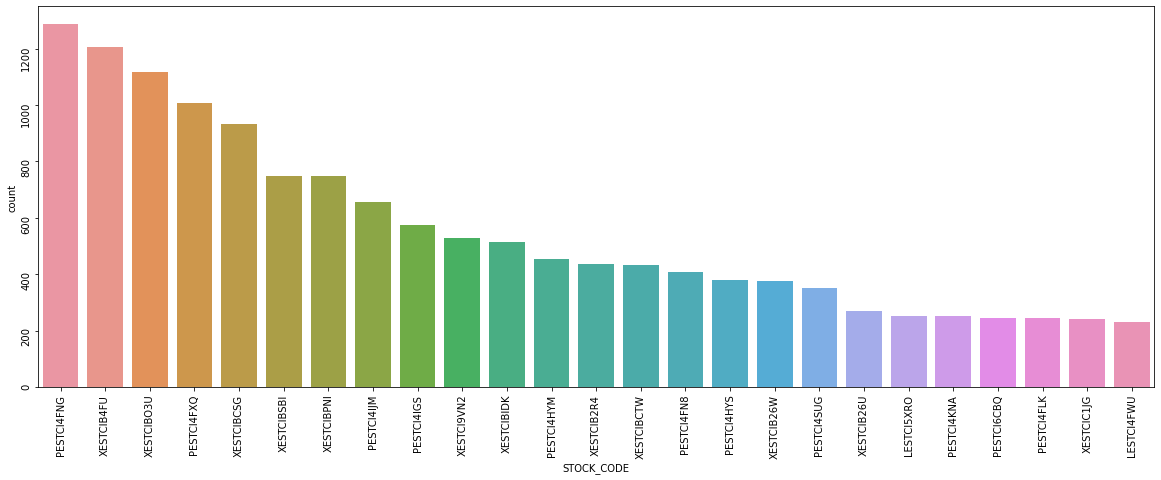

In [15]:
plt.figure(figsize=(20,7))
chart = sns.countplot(x="STOCK_CODE", data=df_top, order = df_top['STOCK_CODE'].value_counts()[:top].index)
chart.tick_params(rotation=90)

In [16]:
df_top.isna().sum()

I_BOOKINGDATE             0
I_STARTDATE               0
I_DAYSBEFOREBOOK          0
STOCK_CODE                0
STOCK_NAME                0
I_TOTAL_SALES_SC          0
SOURCE_COUNTRY_CODE       0
ADT                       0
CHD                       0
INF                       0
AVG_ADT_AGE            5633
LEAD_PAX_AGE           5635
tmed                     36
prec                      0
tmin                     36
tmax                     36
dir                     215
velmedia                103
racha                   215
sol                    3126
presMax                 215
presMin                 215
dtype: int64

GridSpec(6, 6)

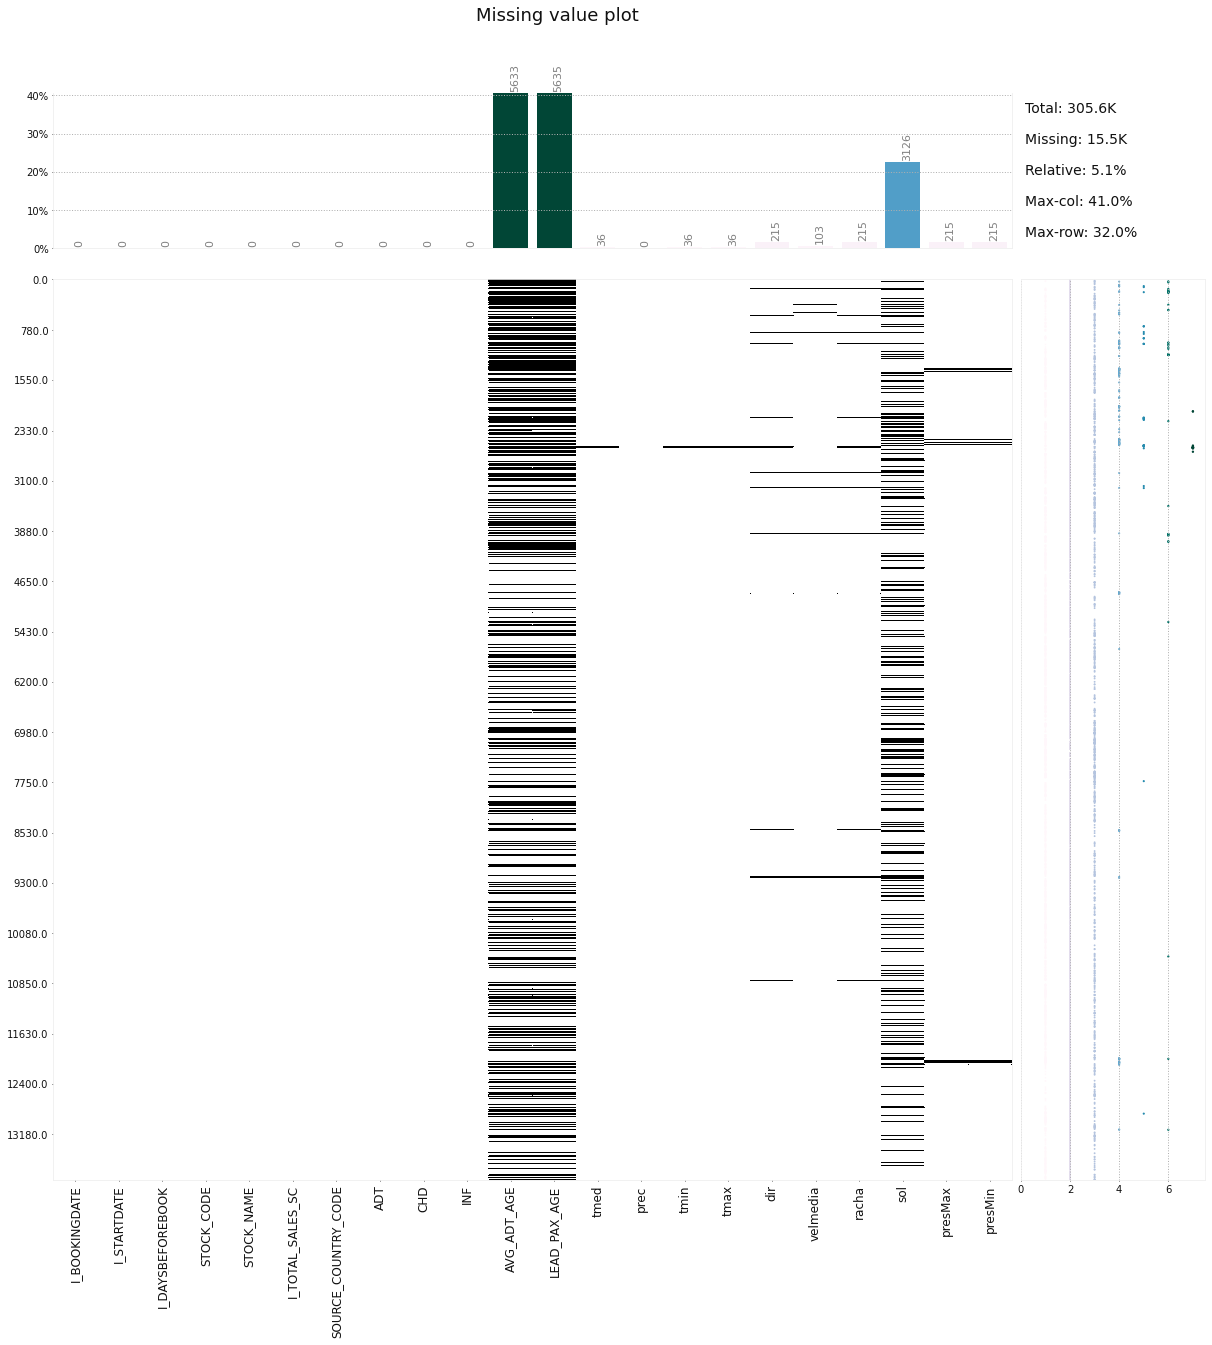

In [17]:
klib.missingval_plot(df_top)

## delete nulls 
**(a cascoporro)**

In [18]:
# Ordeno por startdate y para más adelante poder rellenar los nulos con un forward fill. df=df.fillna(method='ffill')
df_top = df_top.sort_values(by="I_STARTDATE")
df_top.head(5)
df_top.tail(5)

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,...,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
5775,2019-04-21,2019-12-31,254,PESTCI4IGS,Teleferico / Cable Car,-54,GB,2,0,0,...,21.500000,0.0,15.8,27.200001,6.0,5.8,11.7,9.6,1016.000000,1012.599976
25382,2019-12-29,2019-12-31,1,PESTCI4HYS,Gomera Safari Tour,190,LU,2,0,0,...,21.600000,0.0,16.1,27.000000,1.0,3.9,9.7,9.7,1013.500000,1010.200012
25348,2019-12-28,2019-12-31,3,PESTCI4HYS,Gomera Safari Tour,535,NL,4,2,0,...,21.799999,0.0,16.6,27.100000,99.0,4.4,9.7,9.1,1011.599976,1009.200012
25352,2019-12-28,2019-12-31,3,XESTCIB4FU,Teide National Park,52,GB,2,0,0,...,19.200001,0.0,15.3,23.200001,5.0,3.1,6.9,NaN,1006.900024,1004.599976
25396,2019-12-30,2019-12-31,1,PESTCI4FN8,Submarino Safari,85,GB,1,1,0,...,21.500000,0.0,15.8,27.200001,6.0,5.8,11.7,9.6,1016.000000,1012.599976


In [19]:
#peroantes elimino columnas ya con la hostia de nulos
cols_to_exclude = ['I_BOOKINGDATE'
                   ,'I_STARTDATE'
                   ,'SOURCE_COUNTRY_CODE'
                   ,'AVG_ADT_AGE'
                   ,'LEAD_PAX_AGE'
                  ]

df_top.drop(cols_to_exclude, axis=1, inplace=True)
df_top.tail(5)

# y ahora hago un fillna
df_top=df_top.fillna(method='ffill')



In [20]:
klib.missingval_plot(df_top)

No missing values found in the dataset.


### Correlation matrix

<AxesSubplot:>

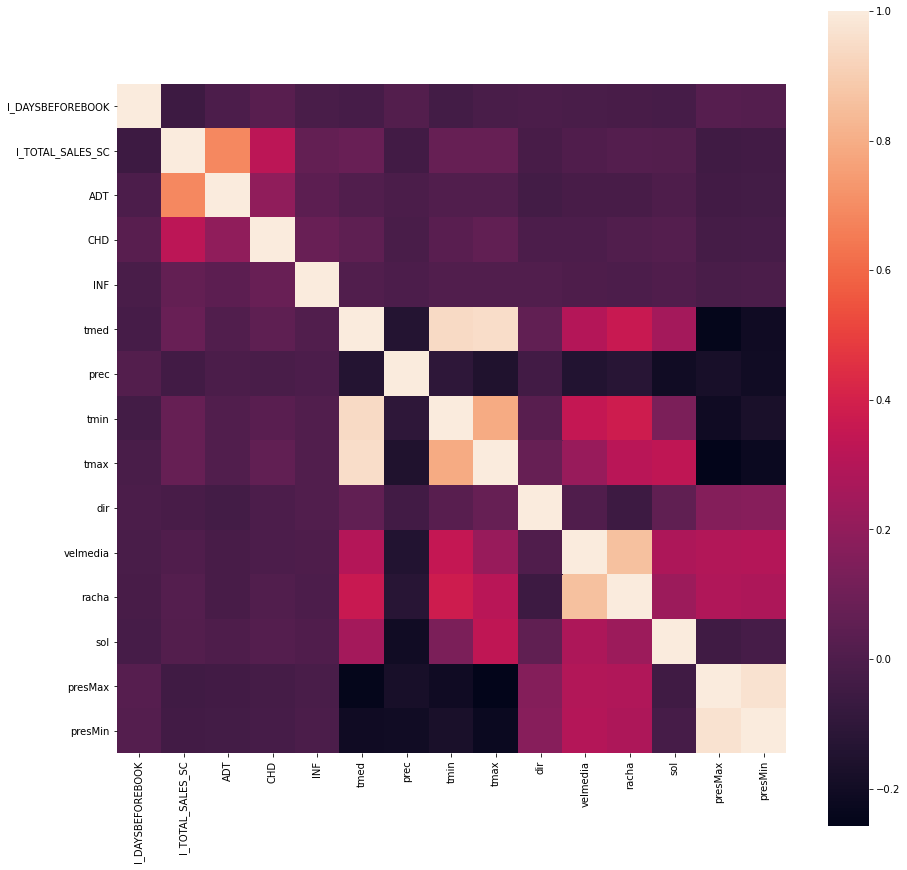

In [21]:
corrmat = df_top.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, square = True)

## Random Forest

In [22]:
from sklearn.model_selection import train_test_split

# Split data
test_size = 0.3
X_train, X_test, y_train, y_test=train_test_split(df_top.drop(['STOCK_CODE','STOCK_NAME'], axis=1), 
                                                  df_top['STOCK_CODE'], 
                                                  test_size=test_size, 
                                                  random_state=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a RF model with default parameters as a baseline.
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

# Predict values on test and evaluate
y_pred=rf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.6869001919385797

               precision    recall  f1-score   support

  LESTCI4FWU       0.84      0.60      0.70        72
  LESTCI5XRO       0.92      0.90      0.91        87
  PESTCI4FLK       0.57      0.41      0.48        75
  PESTCI4FN8       0.41      0.44      0.42       117
  PESTCI4FNG       0.61      0.69      0.65       381
  PESTCI4FXQ       0.65      0.71      0.68       303
  PESTCI4HYM       0.37      0.24      0.29       139
  PESTCI4HYS       0.83      0.77      0.80       112
  PESTCI4IGS       0.80      0.75      0.77       178
  PESTCI4IJM       0.89      0.87      0.88       201
  PESTCI4KNA       0.60      0.57      0.59        68
  PESTCI4SUG       0.38      0.30      0.34       106
  PESTCI6CBQ       0.83      0.57      0.68        68
  XESTCI9VN2       0.90      0.88      0.89       160
  XESTCIB26U       0.56      0.35      0.43        71
  XESTCIB26W       0.38      0.21      0.27       121
  XESTCIB2R4       0.44      0.35      0.39

In [25]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.loc["Total"] = cm.sum()
cm["Total"] = cm.sum(axis=1)
cm

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Total
0,43,0,0,0,1,0,0,0,0,5,...,0,22,0,0,0,0,0,0,0,72
1,0,78,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,7,0,87
2,0,0,31,0,11,3,3,5,0,0,...,2,0,2,0,0,0,3,0,0,75
3,0,0,0,51,11,5,8,0,0,0,...,1,0,1,1,1,13,10,1,0,117
4,0,0,3,16,263,20,6,0,1,1,...,1,0,6,5,3,25,8,2,0,381
5,0,4,2,6,16,216,24,1,3,0,...,2,0,1,0,1,11,3,3,0,303
6,0,0,0,4,12,59,34,0,1,0,...,1,0,2,1,1,9,7,3,0,139
7,0,0,1,0,10,0,2,86,0,0,...,1,0,2,1,0,4,2,1,0,112
8,0,1,0,1,3,4,1,0,133,0,...,2,2,1,1,10,2,3,10,3,178
9,3,0,0,0,1,0,0,0,0,175,...,0,9,0,0,0,0,0,0,1,201


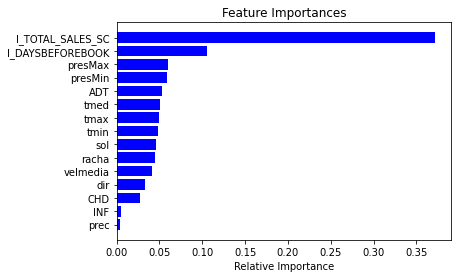

In [26]:
features = df_top.drop(['STOCK_CODE','STOCK_NAME'],axis=1).columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()